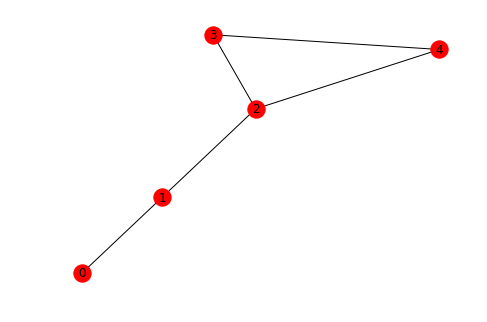

In [41]:
from numpy  import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(2,4)

nx.draw(G, with_labels=True)
plt.show()

According to modularity, which of the following options  forms better communities? <br>
i)	Cluster1={0, 1, 2}, cluster2={3,4}<br>
ii)	Cluster1={0,1}, cluster1={2,3,4}


A is the Adjacency matrix of the graph

In [29]:
A=nx.to_numpy_matrix(G)
print(np.matrix(A))

[[ 0.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.]
 [ 0.  0.  1.  1.  0.]]


In [30]:
m = G.number_of_edges()
print(m) 

5


In [31]:
#initialize M[5][5] to store the multplication of the degree of two nodes
M = [[0 for x in range(5)]for y in range(5)] 

for i in range(0,5):
    for j in range(0,5):
        M[i][j]=G.degree(i)*G.degree(j)
        
print(np.matrix(M))

[[1 2 3 2 2]
 [2 4 6 4 4]
 [3 6 9 6 6]
 [2 4 6 4 4]
 [2 4 6 4 4]]


The matrix B stores the expected number of edges for each pair of nodes.

In [32]:
B = multiply(M,1/(2*m))
print(B)


[[ 0.1  0.2  0.3  0.2  0.2]
 [ 0.2  0.4  0.6  0.4  0.4]
 [ 0.3  0.6  0.9  0.6  0.6]
 [ 0.2  0.4  0.6  0.4  0.4]
 [ 0.2  0.4  0.6  0.4  0.4]]


i)	Cluster1={0, 1, 2}, cluster2={3,4}<br>

In [38]:
C = A - B

cluster1 = {0,1,2}
cluster2 = {3,4}

sum1 = 0
for i in cluster1:
    for j in cluster1:
        sum1 += C.item(i,j)
sum1 = sum1/(2*m)
print("modularity(cluster 1)=%.2f"%(sum1))

sum2 = 0
for i in cluster2:
    for j in cluster2:
        sum2 += C.item(i,j)
sum2 = sum2/(2*m)
print("modularity(cluster 2)=%.2f"%(sum2))

print("overal modularity: ", round(sum1+sum2,2))

modularity(cluster 1)=0.04
modularity(cluster 2)=0.04
overal modularity:  0.08


ii)	Cluster1={0,1}, cluster1={2,3,4}

In [42]:
cluster1 = {0,1}
cluster2 = {2,3,4}

sum1 = 0
for i in cluster1:
    for j in cluster1:
        sum1 += C.item(i,j)
sum1 = sum1/(2*m)
print("modularity(cluster 1)=%.2f"%(sum1))

sum2 = 0
for i in cluster2:
    for j in cluster2:
        sum2 += C.item(i,j)
sum2 = sum2/(2*m)
print("modularity(cluster 2)=%.2f"%(sum2))

print("overal modularity: ", round(sum1+sum2,2))

modularity(cluster 1)=0.11
modularity(cluster 2)=0.11
overal modularity:  0.22


In community detection, we want to separate the nodes into clusters  by maximizing the sum of the modularity of each of clusters. Option (ii) results in a higher overall modularity and is a better breakdown of clusters  than option (i).